In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, \
                      ExponentialFitter, GeneralizedGammaFitter
from sklearn.model_selection import train_test_split

#### Load the data

In [2]:
# Read csv file
telco = pd.read_csv('telco.csv')
telco.drop('ID', axis=1, inplace=True)

In [3]:
# Convert categorical variables to dummy variables
cat_cols = ['retire', 'region', 'marital', 'ed', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']
df = telco.copy()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.rename(columns={'churn_Yes': 'churn'})

In [4]:
df.head()

,tenure,age,address,income,retire_Yes,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn
0,13,44,9,64,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,11,33,7,136,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1
2,68,52,24,116,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,33,33,12,33,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,23,30,9,30,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0


# Parametric Models

#### Build the models

In [5]:
# Fit the Weibull AFT model
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(df, duration_col='tenure', event_col='churn')

# Fit the Log-Normal AFT model
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(df, duration_col='tenure', event_col='churn')

# Fit the Log-Logistic AFT model
loglogistic_aft = LogLogisticAFTFitter()
loglogistic_aft.fit(df, duration_col='tenure', event_col='churn')

# Fit the Exponential AFT model
exponential_aft = ExponentialFitter()
exponential_aft.fit(df['tenure'], df['churn'])

# Fit the Generalized Gamma AFT model
generalizedgamma_aft = GeneralizedGammaFitter()
generalizedgamma_aft.fit(df['tenure'], df['churn'])

<lifelines.GeneralizedGammaFitter:"GeneralizedGamma_estimate", fitted with 1000 total observations, 726 right-censored observations>

#### Compare the models

In [6]:
# Print summary statistics for each model
print("Weibull AFT model:")
print(weibull_aft.print_summary())
print("\nLog-Normal AFT model:")
print(lognormal_aft.print_summary())
print("\nLog-Logistic AFT model:")
print(loglogistic_aft.print_summary())
print("\nExponential AFT model:")
print(exponential_aft.print_summary())
print("\nGeneralized Gamma AFT model:")
print(generalizedgamma_aft.print_summary())

Weibull AFT model:


<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-04-30 18:57:01 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

None

Log-Normal AFT model:


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-04-30 18:57:01 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

None

Log-Logistic AFT model:


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-04-30 18:57:01 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

None

Exponential AFT model:


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

None

Generalized Gamma AFT model:


<lifelines.GeneralizedGammaFitter:"GeneralizedGamma_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.53
               hypothesis = mu_ != 0, ln_sigma_ != 0, lambda_ != 1

---
            coef   se(coef)   coef lower 95%   coef upper 95%
mu_         4.81       0.13             4.55             5.07
ln_sigma_   0.54       0.14             0.26             0.82
lambda_     0.12       0.32            -0.50             0.75

            cmp to     z      p   -log2(p)
mu_           0.00 36.31 <0.005     956.59
ln_sigma_     0.00  3.73 <0.005      12.34
lambda_       1.00 -2.74   0.01       7.35
---
AIC = 3211.06

None


In [7]:
print('Median Survival Time')
print(f'Weibull: {weibull_aft.median_survival_time_}')
print(f'Log-Normal: {lognormal_aft.median_survival_time_}')
print(f'Log-Logistic: {loglogistic_aft.median_survival_time_}')
print(f'Exponential: {exponential_aft.median_survival_time_}')
print(f'Generalized Gamma: {generalizedgamma_aft.median_survival_time_}')

Median Survival Time
Weibull: 38.84764928679419
Log-Normal: 38.953910678318564
Log-Logistic: 36.110654725804906
Exponential: 89.87133805042757
Generalized Gamma: 113.92378959218682


To compare the models, we can calculate the AIC values for each model and select the one with the lowest AIC value.

In [8]:
models_aic={}

weibull_aic = weibull_aft.AIC_
print(f'{weibull_aic=}')
models_aic['Weibull']=weibull_aic

lognormal_aic = lognormal_aft.AIC_
print(f'{lognormal_aic=}')
models_aic['Log-Normal']=lognormal_aic

loglogistic_aic = loglogistic_aft.AIC_
print(f'{loglogistic_aic=}')
models_aic['Log-Logistic']=loglogistic_aic

exponential_aic = exponential_aft.AIC_
print(f'{exponential_aic=}')
models_aic['Exponential']=exponential_aic

generalizedgamma_aic = generalizedgamma_aft.AIC_
print(f'{generalizedgamma_aic=}')
models_aic['Generalized Gamma']=generalizedgamma_aic

weibull_aic=2964.343248083881
lognormal_aic=2954.0240102517123
loglogistic_aic=2956.2085614433336
exponential_aic=3215.9608134637247
generalizedgamma_aic=3211.061199344495


In [9]:
# Find the model with the minimum AIC
min_aic_model = min(models_aic, key=models_aic.get)
min_aic_value = models_aic[min_aic_model]
print(f"The model with the minimum AIC value is {min_aic_model} with AIC = {min_aic_value}")

The model with the minimum AIC value is Log-Normal with AIC = 2954.0240102517123


#### Visualize all the curves

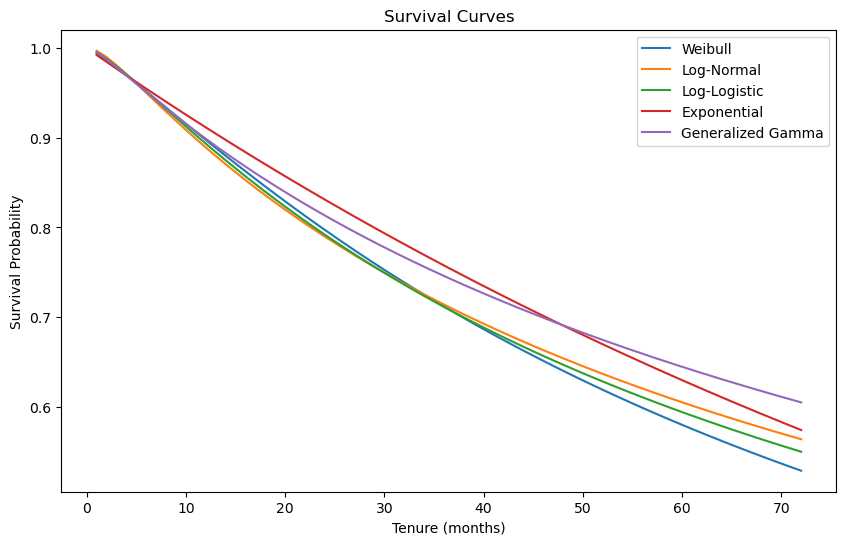

In [10]:
# Predict survival function for each model
weibull_sf = weibull_aft.predict_survival_function(df)
lognormal_sf = lognormal_aft.predict_survival_function(df)
loglogistic_sf = loglogistic_aft.predict_survival_function(df)
exponential_sf = exponential_aft.survival_function_
generalizedgamma_sf = generalizedgamma_aft.survival_function_

# Plot the survival function
plt.figure(figsize=(10, 6))
plt.plot(weibull_sf.index, weibull_sf.mean(1), label='Weibull')
plt.plot(lognormal_sf.index, lognormal_sf.mean(1), label='Log-Normal')
plt.plot(loglogistic_sf.index, loglogistic_sf.mean(1), label='Log-Logistic')
plt.plot(exponential_sf.index, exponential_sf.mean(1), label='Exponential')
plt.plot(generalizedgamma_sf.index, generalizedgamma_sf.mean(1), label='Generalized Gamma')

plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.title('Survival Curves')
plt.legend()
plt.show()

#### Choose Final Model

In [10]:
# select the best model
models = [weibull_aft, lognormal_aft, loglogistic_aft, exponential_aft, generalizedgamma_aft]
best_model = models[np.argmin([m.AIC_ for m in models])]
print('Best model:', type(best_model).__name__)

Best model: LogNormalAFTFitter


In [11]:
print(best_model.print_summary())

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-04-30 18:57:01 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

None


#### Keep siginficant features

From previous table, I define the threshold for p value to be 0.15, hence, if p < 0.15, the column will be considered statistically significnat and will be kept.

In [12]:
# Get the p-values of the features
p_values = best_model.summary['p']

In [13]:
# Select the statistically significant features (p-value < 0.15)
sig_cols = p_values[p_values < 0.15]

In [14]:
# Get the significant column names
sign_cols = []
for tuple_ in sig_cols.keys().tolist():
    sign_cols.append(str(tuple_).split("'")[-2])
sign_cols = sign_cols[:-2]
sign_cols.append('tenure')
sign_cols.append('churn')

In [15]:
# Subset the data to include only the significant columns and the target variable
df = df.loc[:, sign_cols]

In [16]:
df.head(3)

,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,ed_Did not complete high school,ed_High school degree,ed_Some college,income,internet_Yes,marital_Unmarried,voice_Yes,tenure,churn
0,9,44,0,0,0,0,0,0,64,0,0,0,13,1
1,7,33,0,0,1,0,0,0,136,0,0,1,11,1
2,24,52,0,1,0,1,0,0,116,0,0,0,68,0


#### Keep final model

In [17]:
lognormal = LogNormalAFTFitter()
lognormal.fit(df, duration_col='tenure', event_col='churn')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

# CLV

#### CLV per customer

In [18]:
average_margin = 0.2
discount_rate = 0.1
retention_rate = 0.8

In [19]:
telco['CLV'] = (average_margin * (1 - discount_rate) * retention_rate) / (1 + discount_rate - retention_rate) * df['tenure']

In [20]:
telco.head(3)

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,6.24
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,5.28
2,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,32.64


#### CLV within different segments

In [21]:
columns = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']

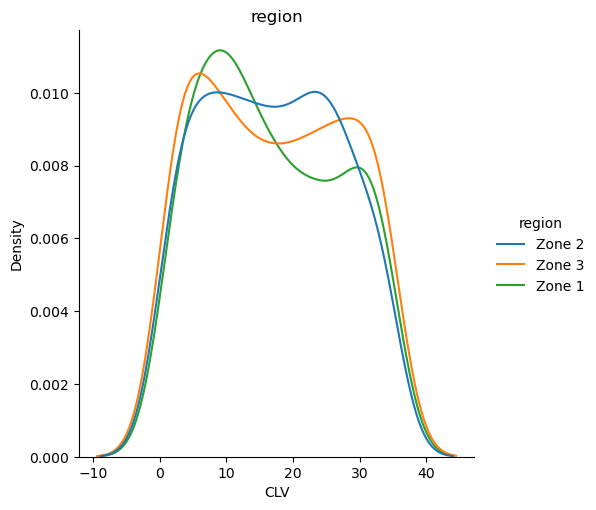

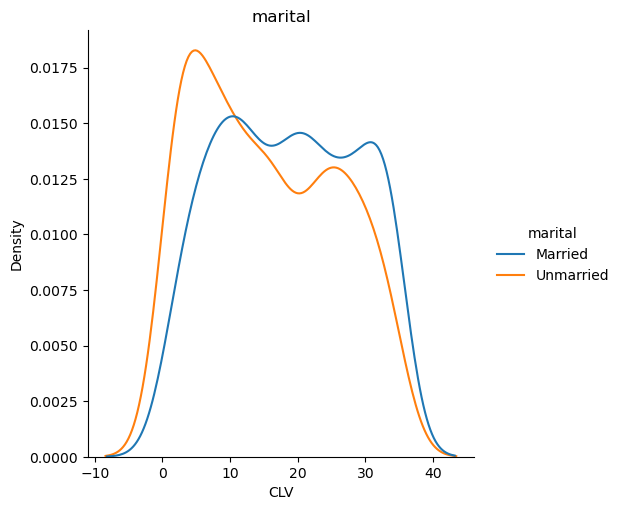

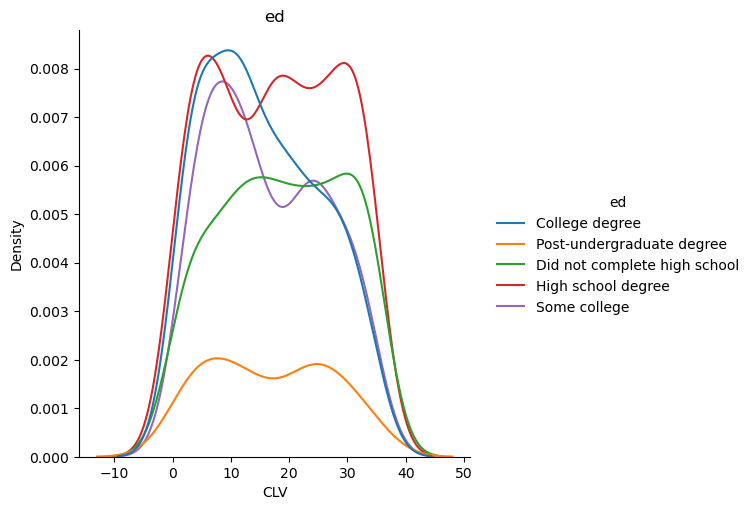

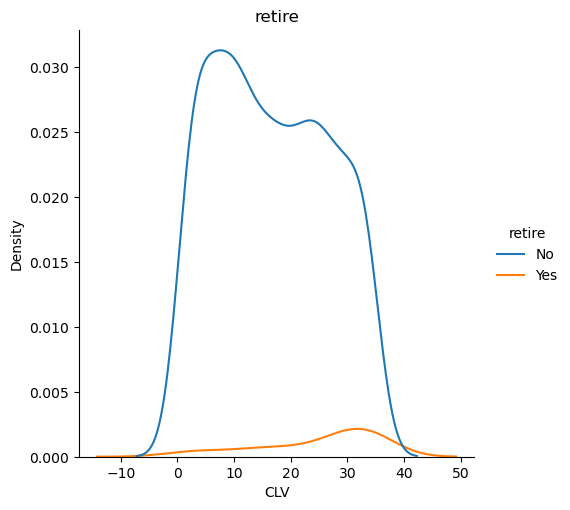

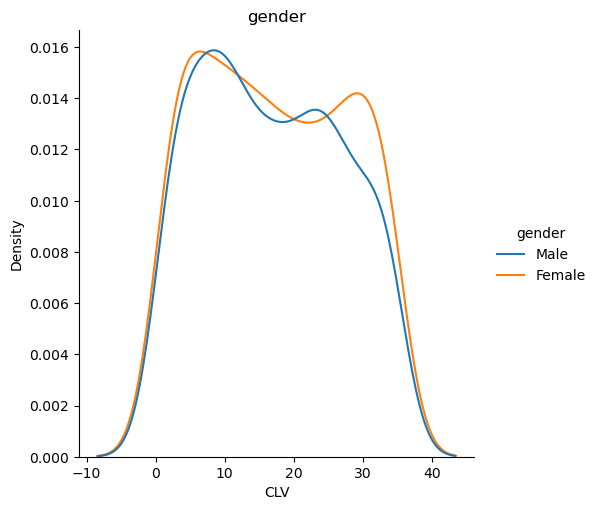

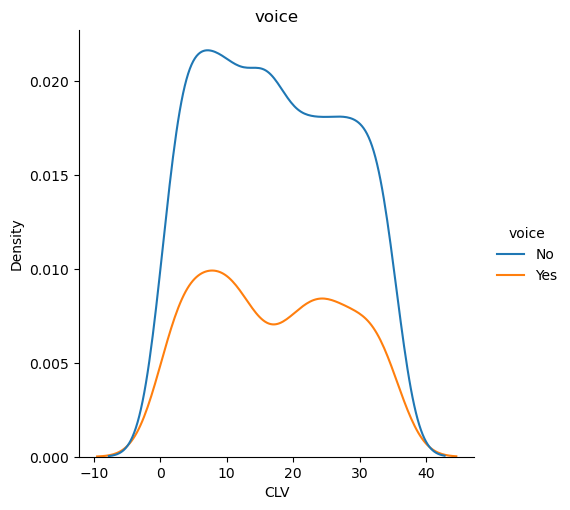

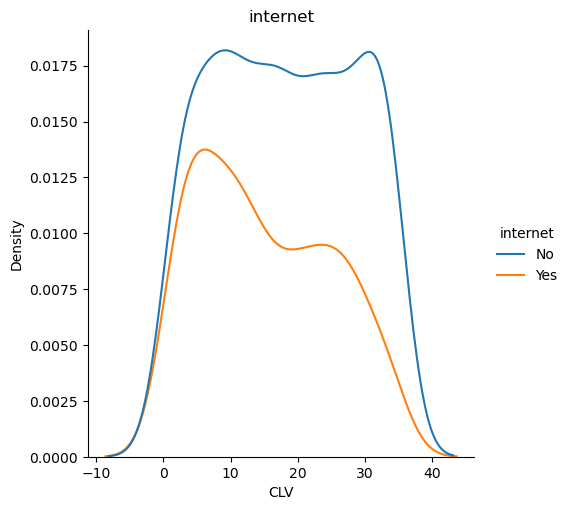

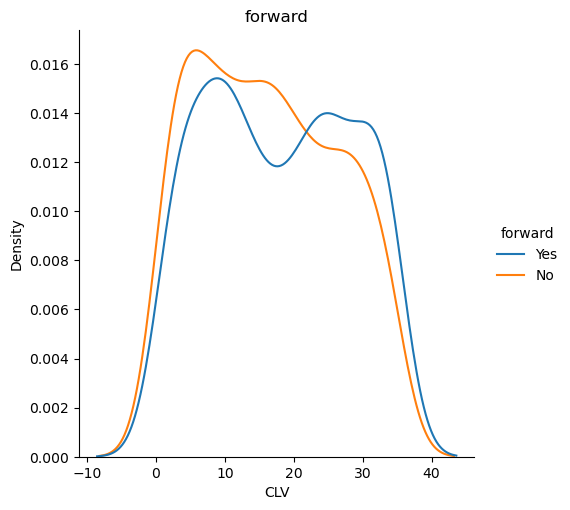

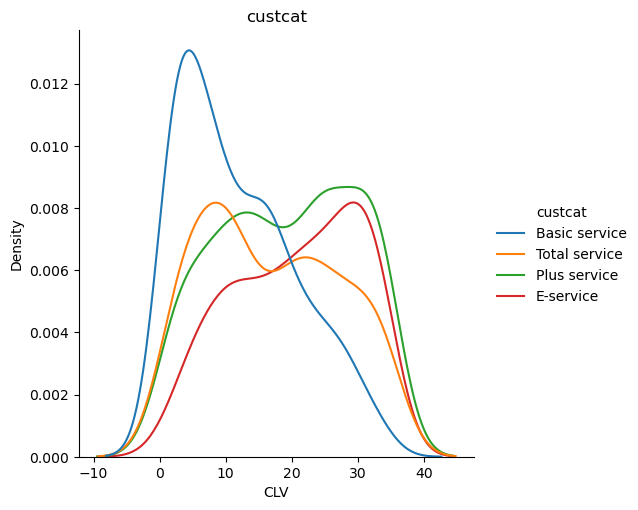

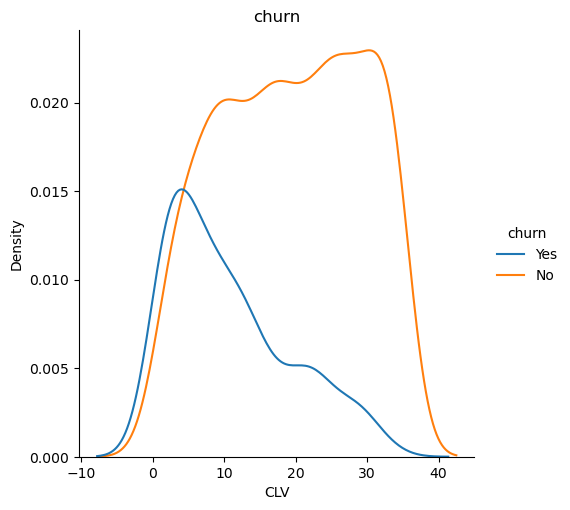

In [22]:
for column in columns:
    sns.displot(telco, kind='kde', x='CLV', hue=column)
    plt.title(column)

In [23]:
for column in columns:
    print(telco.groupby(column)[["CLV"]].mean(), "\n")

              CLV
region           
Zone 1  16.868571
Zone 2  16.996886
Zone 3  17.278605 

                 CLV
marital             
Married    18.648242
Unmarried  15.488317 

                                    CLV
ed                                     
College degree                15.394872
Did not complete high school  18.875294
High school degree            17.726551
Post-undergraduate degree     16.676364
Some college                  16.322297 

              CLV
retire           
No      16.663001
Yes     24.949787 

              CLV
gender           
Female  17.285571
Male    16.802981 

             CLV
voice           
No     17.090345
Yes    16.965789 

                CLV
internet           
No        18.154177
Yes       15.160435 

               CLV
forward           
No       16.184615
Yes      17.944990 

                     CLV
custcat                 
Basic service  11.844812
E-service      20.805899
Plus service   19.237580
Total service  16.869153 

          

# Report

The goal is to understand the factors affecting the churn risk.

#### Interpret the coefficients
To interpret the coefficients, we can observe the CLV values for each segment and compare them to each other. For example, we can see that customers who are retired have a higher CLV than those who are not retired, and customers with a college degree have a lower CLV than those who did not complete high school or have a high school degree.

#### Try to find the most valuable segments (describe the personal definition of being valuable)
To find the most valuable segments, we can identify the segments with the highest CLV values, which in this case include customers who have Plus or Total service, customers who have not churned, and customers who do not use forwarding or internet services. However, it's important to note that the definition of being valuable may vary depending on the business goals and objectives. For example, a business may prioritize customer satisfaction or revenue growth over CLV. Therefore, the most valuable segments may differ depending on the business context and goals.

#### How much would be your annual retention budget?
To estimate the annual retention budget, we need to first identify how many customers are at risk of churning within a year. We can do this by analyzing the customer data provided and estimating the probability of churn over time using survival analysis techniques.

Once we know how many customers are at risk of churning, we can estimate the cost of retaining them using various strategies, such as offering discounts or incentives, providing excellent customer service, or improving the quality of the product or service.

The annual retention budget will depend on the cost of these retention efforts and the expected return on investment from retaining customers. In other words, we need to weigh the cost of retaining customers against the potential revenue that they would generate for the business in the future.

To detect the approximate number of at-risk subscribers within a year, we can use the predict_percentile method of the LogNormalAFTFitter class from the lifelines library. The predict_percentile method predicts the time at which a certain percentile of the customers will churn. We can use this method to predict the time at which 50% of the customers will churn, and count the number of customers whose tenure is less than the predicted time.

Here is the Python code to detect the approximate number of at-risk subscribers within a year:

In [24]:
# Predict the time at which 50% of the customers will churn
at_risk_time = lognormal.predict_percentile(df, p=0.5)

# Count the number of customers whose tenure is less than the predicted time
at_risk_customers = df[df['tenure'] < at_risk_time].shape[0]

print(f"Approximately {at_risk_customers} customers are at risk within a year.")

# annual_retention_budget = at_risk_customers * retention_cost_per_customer

Approximately 909 customers are at risk within a year.


Note: This is a rough estimation based on previous results, and the formula for calculating the retention budget is given as well.

#### What else would you suggest doing for retention?
There are several strategies that can be used to improve retention. Some possible suggestions include improving customer service, offering loyalty programs or rewards, providing personalized offers or recommendations, simplifying the purchasing process, and improving the overall customer experience. Additionally, conducting surveys or gathering customer feedback can help identify specific pain points or areas for improvement, allowing for targeted retention efforts.